## kNN and DT comparison plots

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [13]:
import sklearn.tree
import matplotlib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def plot_decision(model, X, y, grid_step=0.02, cmap='bwr', alpha:float=0.6, axes=None):

    x_top_left = X.min(axis=0) - 1
    x_bottom_right = X.max(axis=0) + 1
    grid_x0, grid_x1 = np.meshgrid(
         np.arange(x_top_left[0], x_bottom_right[0], grid_step),
         np.arange(x_top_left[1], x_bottom_right[1], grid_step)
      )

    y_pred_grid = model.predict(np.stack([grid_x0.ravel(), grid_x1.ravel()],axis=1)).reshape(grid_x1.shape)

    labels = np.sort(np.unique(y))
    labels = np.concatenate([[labels[0] - 1], labels,[labels[-1] + 1]])
    medians = (labels[1:] + labels[:-1]) / 2
    if axes is None:
        _, axes = plt.subplots()
    axes.contourf(grid_x0, grid_x1, y_pred_grid, colors = ['k','r','k','r'], alpha=0.25, levels=medians)

    y_pred = model.predict(X)
    for i in range(2):
      index = np.where(y == i)
      axes.scatter(X[index,0], X[index, 1], c = ['k','r'][i], s = 15,  marker=["x","o"][i], label = ["Class A","Class B"][i])

    axes.set_ylabel('Dimension Y', fontsize=14)   
    axes.set_xlabel('Dimension X', fontsize=14)   
    axes.legend(fontsize = 11.5)
    axes.tick_params(axis='x', labelsize=14)
    axes.tick_params(axis='y', labelsize=14)

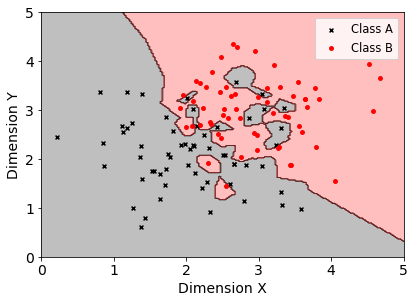

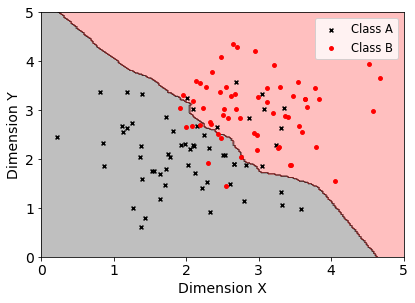

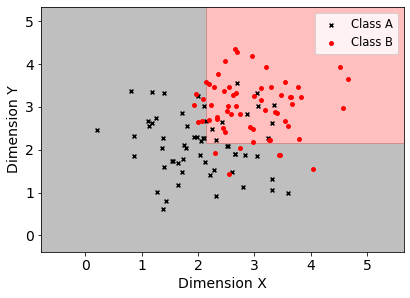

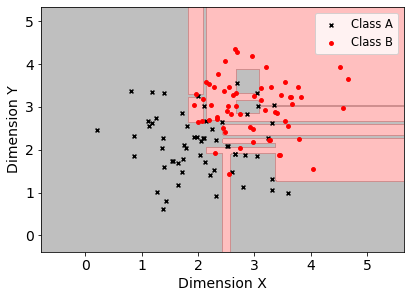

In [14]:
from matplotlib import axes
class kNN:
  def __init__(self, sample, class_dict, x_blob, y_blob):
    self.sample = sample
    self.class_dict = class_dict
    self.x_blob = x_blob
    self.y_blob = y_blob

  def distance_to_a_swarm(self, point):
    dist = np.sqrt((self.x_blob[:,0] - point[0])**2 + (self.x_blob[:,1] - point[1])**2)
    return dist

  def estimate_class(self, k, dist):
    sorted = np.argsort(dist)
    class_counter = np.zeros(self.class_dict)
    for neighbor in range(k):
      neighbor_id = sorted[neighbor]
      class_counter[self.y_blob[neighbor_id]] += 1
    return np.argmax(class_counter)
    
  def classify(self, point, k):
    dist = self.distance_to_a_swarm(point)
    class_ID = self.estimate_class(k, dist)
    return class_ID

def main():
  sample = 120
  class_dict = 2
  centers = [[2, 2], [3, 3]]
  k1, k2 = 1, 100
  
  x_blob, y_blob = make_blobs(n_samples = sample, centers = centers, random_state=0, cluster_std=0.7)
  alg_ex = kNN(sample, class_dict, x_blob, y_blob)

  N = 200
  x = np.linspace(0., 5.0, N)
  y = np.linspace(0., 5.0, N)
  X, Y = np.meshgrid(x, y)
  class_map1, class_map2 = X*Y, X*Y
  for i in range(len(x)):
    for j in range(len(y)):
      class_map1[i,j] = alg_ex.classify( [X[i,j], Y[i,j]], k1 )
      class_map2[i,j] = alg_ex.classify( [X[i,j], Y[i,j]], k2 )

  color = ['k','r']
  fig, ax = plt.subplots(figsize=(6.5,4.5))
  ax.contourf(X,Y,class_map1, colors = ['k','k','r','k'], alpha = 0.25)
  for i in range(class_dict):
    index = np.where(y_blob == i)
    ax.scatter(x_blob[index,0], x_blob[index, 1], c = color[i], s = 15,  marker=["x","o"][i], label = ["Class A","Class B"][i])
  ax.tick_params(axis='x', labelsize=14)
  ax.tick_params(axis='y', labelsize=14)
  ax.set_ylabel('Dimension Y', fontsize=14)   
  ax.set_xlabel('Dimension X', fontsize=14)   
  ax.legend(fontsize = 11.5)

  fig, ax = plt.subplots(figsize=(6.5,4.5))
  ax.tick_params(axis='x', labelsize=14)
  ax.set_ylabel('Dimension Y', fontsize=14)   
  ax.set_xlabel('Dimension X', fontsize=14)   
  ax.tick_params(axis='y', labelsize=14)
  ax.contourf(X,Y,class_map2, colors= ['k','k','r','k'], alpha = 0.25)
  for i in range(class_dict):
    index = np.where(y_blob == i)
    ax.scatter(x_blob[index,0], x_blob[index, 1], c = color[i], s = 15,  marker=["x","o"][i], label = ["Class A","Class B"][i])
  ax.legend(fontsize = 11.5)

  model = DecisionTreeClassifier(max_depth=2).fit(x_blob, y_blob)
  fig, ax = plt.subplots(figsize=(6.5,4.5))
  plot_decision(model, x_blob, y_blob, axes=ax)

  model = DecisionTreeClassifier(max_depth=10).fit(x_blob, y_blob)
  fig, ax = plt.subplots(figsize=(6.5,4.5))
  plot_decision(model, x_blob, y_blob, axes=ax)

if __name__ == "__main__":
  main()
